## Further Analysis on Data (Existing Labelled + Newly Classified)

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
tqdm.pandas()

In [ ]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  

In [ ]:
pd.options.display.float_format='{:20,.8f}'.format

In [ ]:
rdd_df = pd.DataFrame(pd.read_csv("../data/reddit_depression_dataset_cleaned.csv", index_col=0))
print(rdd_df.shape)
rdd_df.head()

(1987011, 12)


,label,date,upvotes,num_comments,combined_text,tokenized_text,alphanum_text,stopword_removed_text,stemmed_text,non_stopword_removed_stemmed_text,combined_stemmed_text,combined_non_stopword_removed_stemmed_text
0,0.00000000,2014-07-14 03:35:09,4.00000000,0.00000000,Deep thoughts underdog Only when we start cons...,"['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'only', 'when...","['deep', 'thoughts', 'underdog', 'start', '99'...","['deep', 'thought', 'underdog', 'start', '99',...","['deep', 'thought', 'underdog', 'onli', 'when'...",deep thought underdog start 99 underdog start ...,deep thought underdog onli when we start consi...
1,0.00000000,2014-09-13 00:31:19,4.00000000,1.00000000,"I like this sub, there's only two posts yet I ...","['i', 'like', 'this', 'sub', ',', ""there's"", '...","['i', 'like', 'this', 'sub', 'only', 'two', 'p...","['posts', 'coming', 'human', 'morality', 'joke...","['post', 'come', 'human', 'moral', 'joke', 'lo...","['i', 'like', 'thi', 'sub', 'onli', 'two', 'po...",post come human moral joke long abscenc hope d...,i like thi sub onli two post yet i keep come b...
2,0.00000000,2014-11-20 04:31:58,6.00000000,1.00000000,Rebirth! Hello. \nI am the new guy in charge h...,"['rebirth', '!', 'hello', '.', 'i', 'am', 'the...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...","['rebirth', 'guy', 'charge', 'thegood', 'ofc',...","['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...","['rebirth', 'hello', 'i', 'am', 'the', 'new', ...",rebirth guy charg thegood ofc bring weirdpinea...,rebirth hello i am the new guy in charg here b...
3,0.00000000,2014-11-20 19:38:05,25.00000000,2.00000000,"""I want to be like water. I want to slip throu...","['""', 'i', 'want', 'to', 'be', 'like', 'water'...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...","['water', 'slip', 'fingers', 'hold', 'ship', '...","['water', 'slip', 'finger', 'hold', 'ship', 'm...","['i', 'want', 'to', 'be', 'like', 'water', 'i'...",water slip finger hold ship michel william,i want to be like water i want to slip through...
5,0.00000000,2014-11-22 19:17:39,8.00000000,23.00000000,What is the limit of the knowledge and power a...,"['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...","['limit', 'knowledge', 'power', 'human', 'pers...","['limit', 'knowledg', 'power', 'human', 'perso...","['what', 'is', 'the', 'limit', 'of', 'the', 'k...",limit knowledg power human person infinit grow,what is the limit of the knowledg and power a ...


In [ ]:
oms_df = pd.DataFrame(pd.read_csv("../data/1.6_million_dataset_labelled_LogReg.csv"))
print(oms_df.shape)
oms_df.head()

(1600000, 4)


,date,stemmed_text,sentiment,predicted_label
0,2009-04-06 22:19:45,"['awww', 'bummer', 'shoulda', 'david', 'carr',...",Negative,0
1,2009-04-06 22:19:49,"['upset', 'updat', 'facebook', 'text', 'result...",Negative,0
2,2009-04-06 22:19:53,"['dive', 'time', 'ball', 'manag', 'save', '50'...",Negative,0
3,2009-04-06 22:19:57,"['bodi', 'feel', 'itchi']",Negative,0
4,2009-04-06 22:19:57,"['behav', 'mad']",Negative,0


In [ ]:
mhw_df = pd.DataFrame(pd.read_csv("../data/mental_health_dataset_labelled_LogReg.csv"))
print(mhw_df.shape)
mhw_df.head()

(724745, 10)


,Date,location,followers,likes,rt,replies,engagement,stemmed_tweet,sentiment,predicted_label
0,2023-02-15 13:48:52+00:00,Haringey,317,5,1,0,0.02208202,"['peopl', 'ocd', 'experi', 'intens', 'neg', 'r...",Negative,1
1,2023-02-09 22:37:56+00:00,unknown,9,0,0,0,0.00000000,"['erika', 'iocdf', 'grassroot', 'advoc', 'love...",Positive,0
2,2022-10-20 11:30:07+00:00,Gloucester,905,0,0,0,0.00000000,"['light', 'week', 'ocd', 'awar', 'week', 'want...",Positive,1
3,2022-10-18 19:42:14+00:00,"Boston, MA",19257,5,2,0,0.00046736,"['gif', 'view', 'giphi', 'hope', 'campaign', '...",Positive,0
4,2022-10-18 19:42:13+00:00,"Boston, MA",19257,7,2,1,0.00072701,"['ocdweek', 'event', 'activ', 'livestream', 'l...",Positive,0


### Data Processing

In [ ]:
rdd_df = rdd_df[['date', 'upvotes', 'num_comments', 'stemmed_text', 'label']]
rdd_df.head()

,date,upvotes,num_comments,stemmed_text,label
0,2014-07-14 03:35:09,4.00000000,0.00000000,"['deep', 'thought', 'underdog', 'start', '99',...",0.00000000
1,2014-09-13 00:31:19,4.00000000,1.00000000,"['post', 'come', 'human', 'moral', 'joke', 'lo...",0.00000000
2,2014-11-20 04:31:58,6.00000000,1.00000000,"['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...",0.00000000
3,2014-11-20 19:38:05,25.00000000,2.00000000,"['water', 'slip', 'finger', 'hold', 'ship', 'm...",0.00000000
5,2014-11-22 19:17:39,8.00000000,23.00000000,"['limit', 'knowledg', 'power', 'human', 'perso...",0.00000000


In [ ]:
oms_df.rename(columns={"predicted_label": "label"}, inplace=True)
oms_df.loc[0]

date                                          2009-04-06 22:19:45
stemmed_text    ['awww', 'bummer', 'shoulda', 'david', 'carr',...
sentiment                                                Negative
label                                                           0
Name: 0, dtype: object

In [ ]:
mhw_df.rename(columns={"Date": "date", "stemmed_tweet": "stemmed_text", "predicted_label": "label"}, inplace=True)
mhw_df.loc[0]

date                                    2023-02-15 13:48:52+00:00
location                                                Haringey 
followers                                                     317
likes                                                           5
rt                                                              1
replies                                                         0
engagement                                             0.02208202
stemmed_text    ['peopl', 'ocd', 'experi', 'intens', 'neg', 'r...
sentiment                                                Negative
label                                                           1
Name: 0, dtype: object

In [ ]:
rdd_df['stemmed_text'] = rdd_df['stemmed_text'].progress_apply(lambda x: ast.literal_eval(x))
oms_df['stemmed_text'] = oms_df['stemmed_text'].progress_apply(lambda x: ast.literal_eval(x))
mhw_df['stemmed_text'] = mhw_df['stemmed_text'].progress_apply(lambda x: ast.literal_eval(x))
print(type(rdd_df['stemmed_text'].loc[0]))
print(type(oms_df['stemmed_text'].loc[0]))
print(type(mhw_df['stemmed_text'].loc[0]))

  0%|          | 0/1987011 [00:00<?, ?it/s]

  0%|          | 0/1600000 [00:00<?, ?it/s]

  0%|          | 0/724745 [00:00<?, ?it/s]

<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
rdd_df.describe()

,upvotes,num_comments,label
count,"1,987,011.00000000","1,987,011.00000000","1,987,011.00000000"
mean,64.77329567,15.16354665,0.11341759
std,967.47921286,78.97801511,0.31710265
min,4.00000000,-3.00000000,0.00000000
25%,5.00000000,3.00000000,0.00000000
50%,7.00000000,7.00000000,0.00000000
75%,10.00000000,14.00000000,0.00000000
max,"128,866.00000000","21,131.00000000",1.00000000


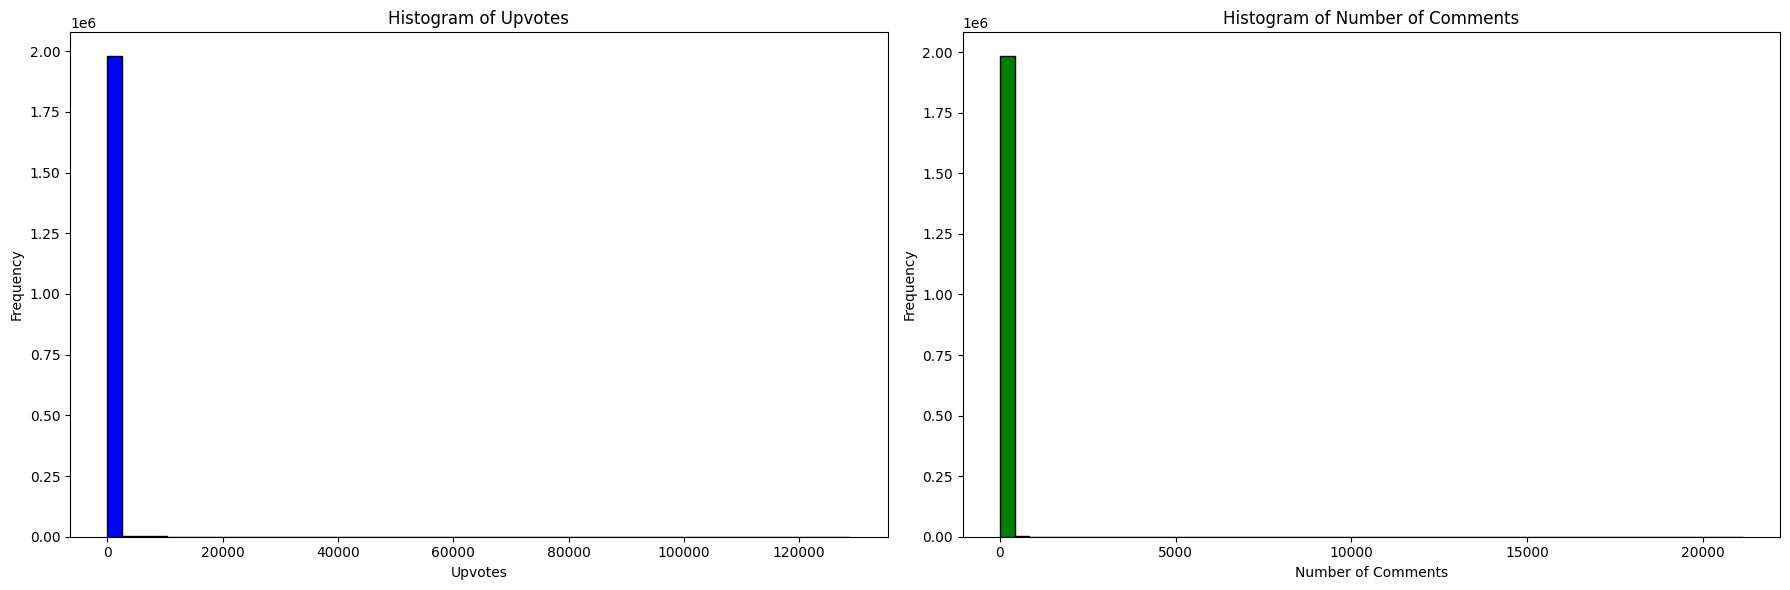

In [ ]:
# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram of upvotes
axes[0].hist(rdd_df['upvotes'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Upvotes')
axes[0].set_xlabel('Upvotes')
axes[0].set_ylabel('Frequency')

# Histogram of num_comments
axes[1].hist(rdd_df['num_comments'], bins=50, color='green', edgecolor='black')
axes[1].set_title('Histogram of Number of Comments')
axes[1].set_xlabel('Number of Comments')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the 80th percentile for upvotes and num_comments
upvotes_80th = rdd_df['upvotes'].quantile(0.80)
num_comments_80th = rdd_df['num_comments'].quantile(0.80)

# Filter the DataFrame to keep only rows up to the 80th percentile
rdd_df2 = rdd_df[(rdd_df['upvotes'] <= upvotes_80th) & (rdd_df['num_comments'] <= num_comments_80th)]

rdd_df2.shape

(1355009, 5)

In [ ]:
rdd_df2 = rdd_df2[rdd_df2['num_comments'] >= 0]
rdd_df2.shape

(1355008, 5)

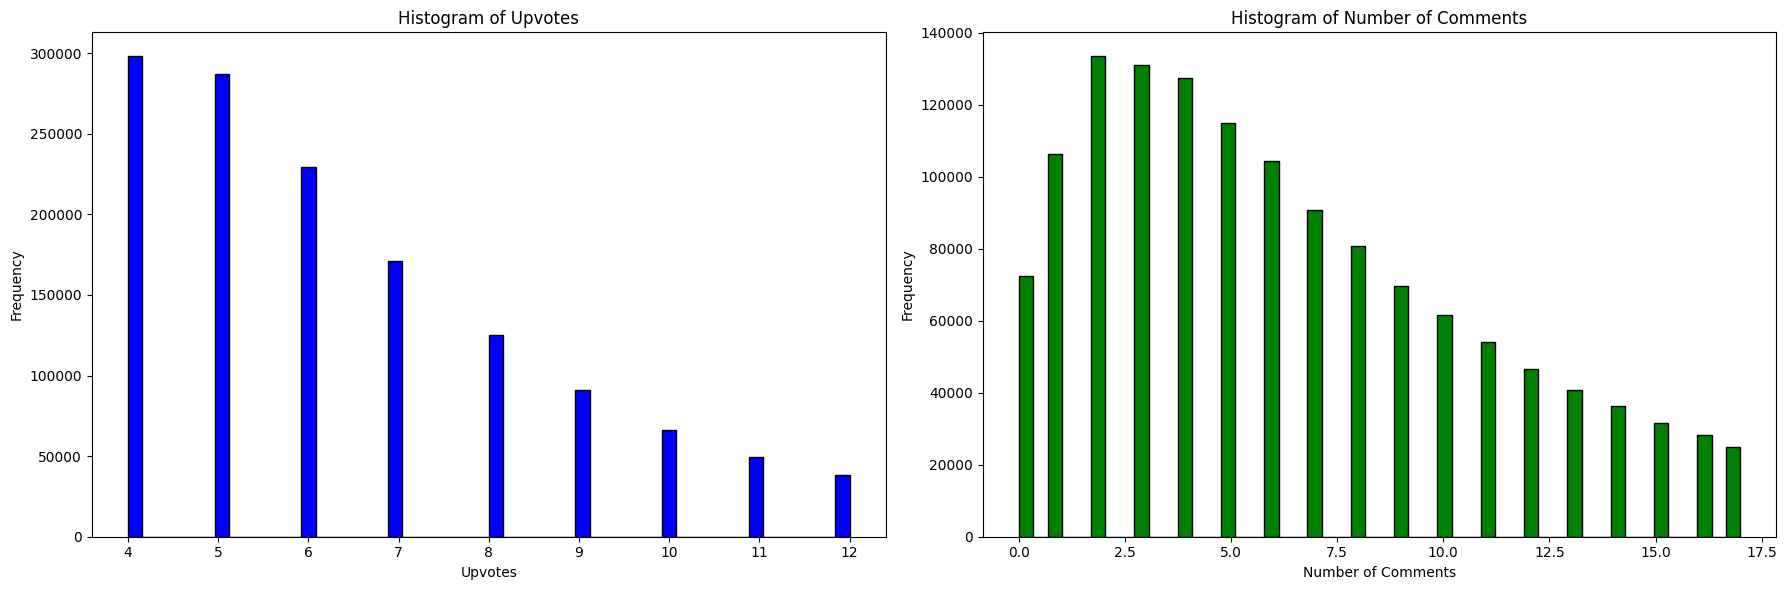

In [ ]:
# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram of upvotes
axes[0].hist(rdd_df2['upvotes'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Upvotes')
axes[0].set_xlabel('Upvotes')
axes[0].set_ylabel('Frequency')

# Histogram of num_comments
axes[1].hist(rdd_df2['num_comments'], bins=50, color='green', edgecolor='black')
axes[1].set_title('Histogram of Number of Comments')
axes[1].set_xlabel('Number of Comments')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
mhw_df.describe()

,followers,likes,rt,replies,engagement,label
count,"724,745.00000000","724,745.00000000","724,745.00000000","724,745.00000000","724,745.00000000","724,745.00000000"
mean,"15,395.29382196",7.07235924,2.34297029,0.40208073,0.01534192,0.19388061
std,"313,744.36404322",143.33861106,31.21459135,7.54942242,0.29190270,0.39533673
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,433.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,"1,387.00000000",2.00000000,0.00000000,0.00000000,0.00143266,0.00000000
75%,"4,364.00000000",5.00000000,2.00000000,0.00000000,0.00687758,0.00000000
max,"84,834,862.00000000","74,341.00000000","11,917.00000000","2,570.00000000",182.12162162,1.00000000


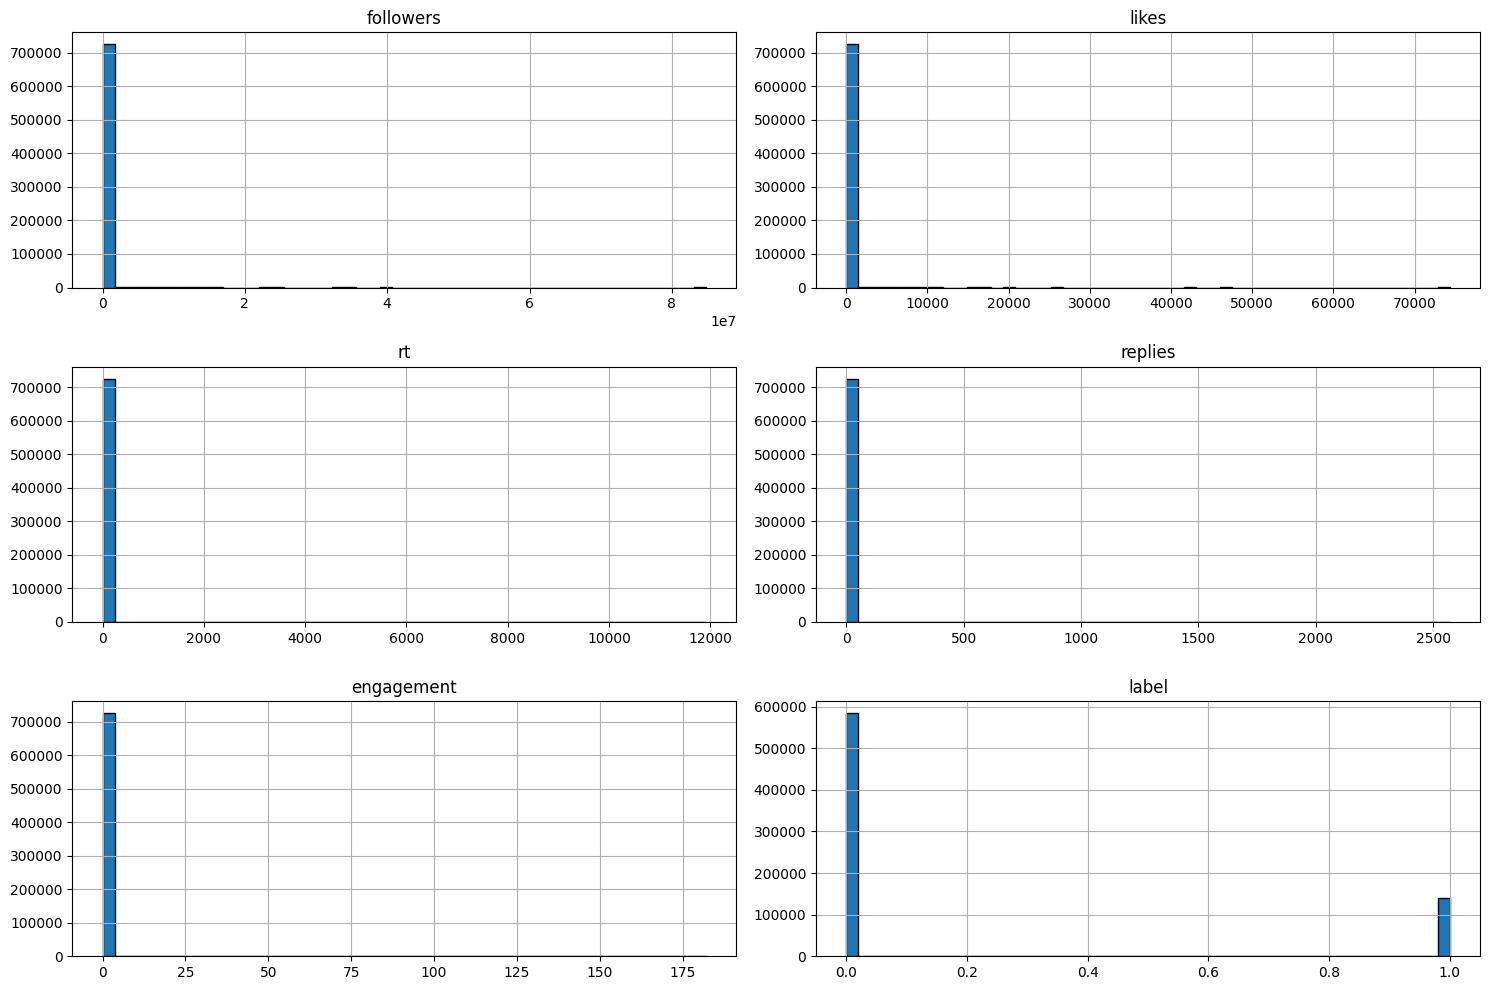

In [ ]:
mhw_df.hist(figsize=(15, 10), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the 80th percentile
followers_80th = mhw_df['followers'].quantile(0.80)
likes_80th = mhw_df['likes'].quantile(0.80)
rt_80th = mhw_df['rt'].quantile(0.80)
replies_80th = mhw_df['replies'].quantile(0.80)
engagement_80th = mhw_df['engagement'].quantile(0.80)

# Filter the DataFrame to keep only rows up to the 80th percentile
mhw_df2 = mhw_df[(mhw_df['followers'] <= followers_80th) & 
                 (mhw_df['likes'] <= likes_80th) & 
                 (mhw_df['rt'] <= rt_80th) & 
                 (mhw_df['replies'] <= replies_80th) & 
                 (mhw_df['engagement'] <= engagement_80th)]

mhw_df2.shape

(363099, 10)

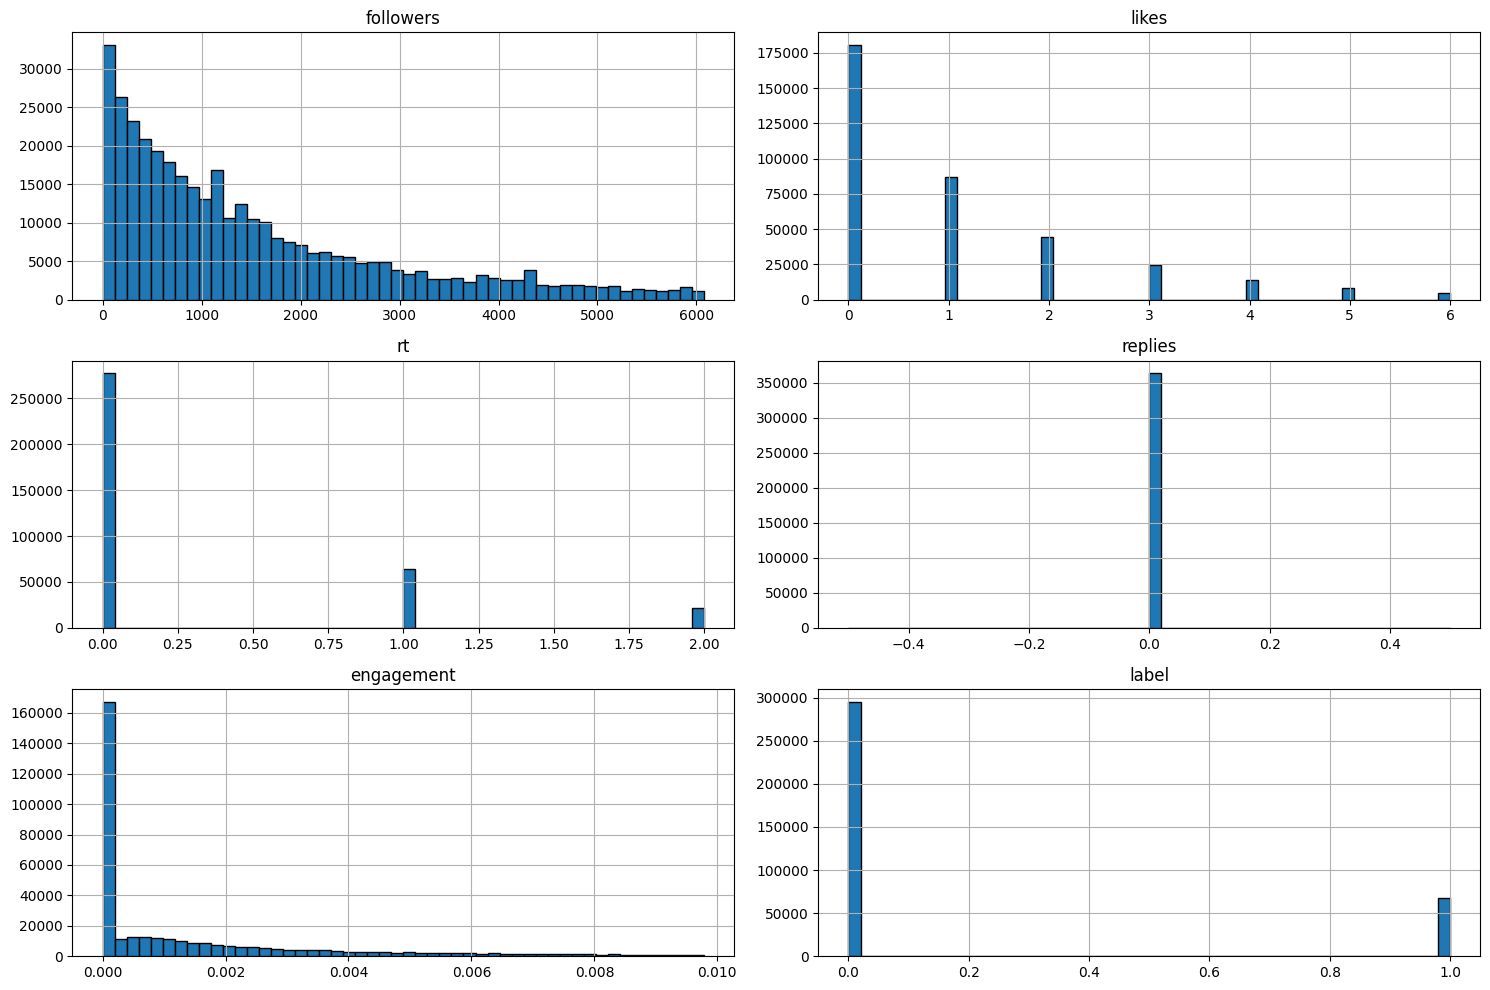

In [ ]:
mhw_df2.hist(figsize=(15, 10), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

### Sampling

In [ ]:
# Determine the minimum count of samples for each label
rdd_min_count = rdd_df2['label'].value_counts().min()
oms_min_count = oms_df['label'].value_counts().min()
mhw_min_count = mhw_df2['label'].value_counts().min()

# Sample the dataframes
rdd_sampled = rdd_df2.groupby('label').sample(n=rdd_min_count, random_state=42)
oms_sampled = oms_df.groupby('label').sample(n=oms_min_count, random_state=42)
mhw_sampled = mhw_df2.groupby('label').sample(n=mhw_min_count, random_state=42)

# Display the shapes of the sampled dataframes
print(rdd_sampled.shape)
print(oms_sampled.shape)
print(mhw_sampled.shape)

(300792, 5)
(96836, 4)
(135860, 10)


### Visualization Analysis

Correlation Analysis

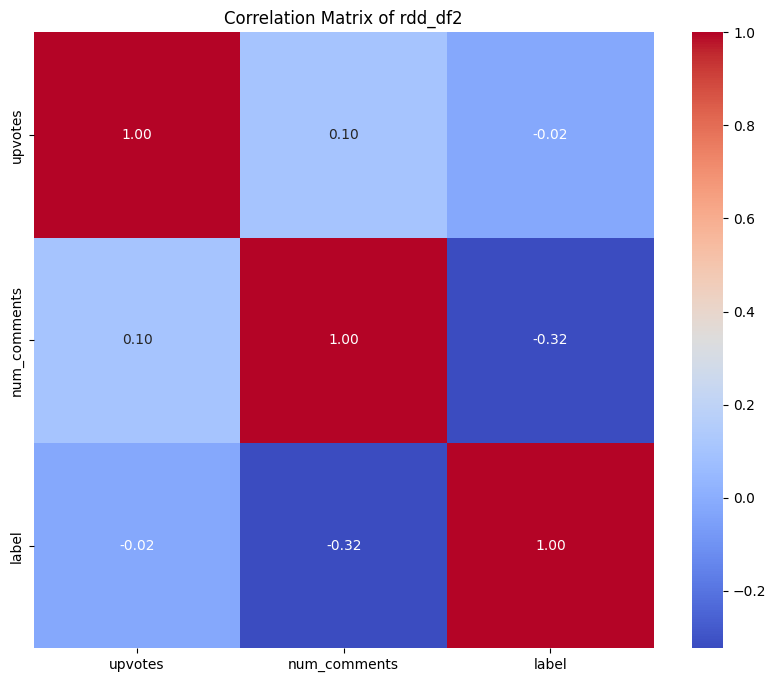

In [ ]:
# Compute the correlation matrix
rdd_corr_matrix = rdd_sampled[['upvotes', 'num_comments', 'label']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rdd_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of rdd_df2')
plt.show()

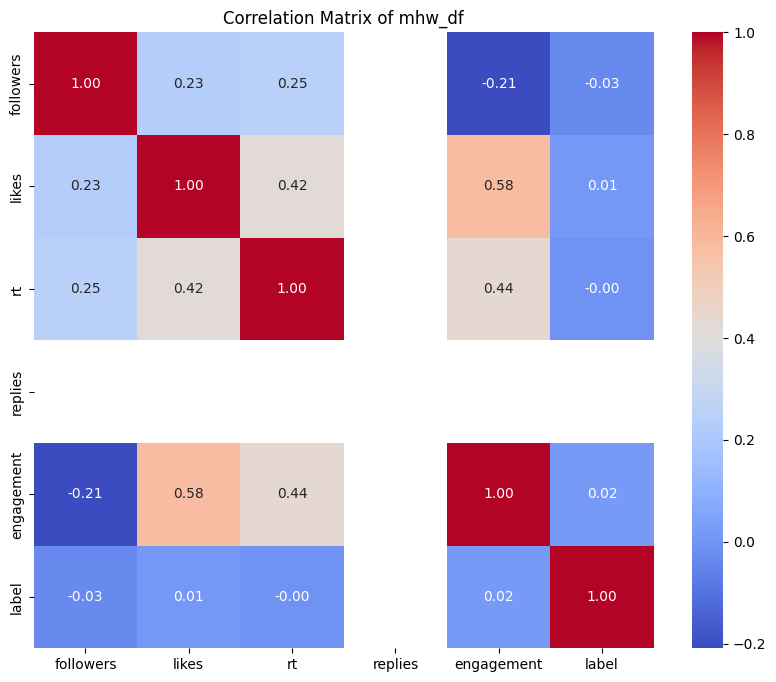

In [ ]:
# Compute the correlation matrix for numerical attributes in oms_df
mhw_corr_matrix = mhw_sampled[['followers', 'likes', 'rt', 'replies', 'engagement', 'label']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mhw_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of mhw_df')
plt.show()

In [ ]:
sentiment_df = pd.concat([oms_df[['sentiment', 'label']], mhw_df[['sentiment', 'label']]], axis=0)
sentiment_df.head()

,sentiment,label
0,Negative,0
1,Negative,0
2,Negative,0
3,Negative,0
4,Negative,0


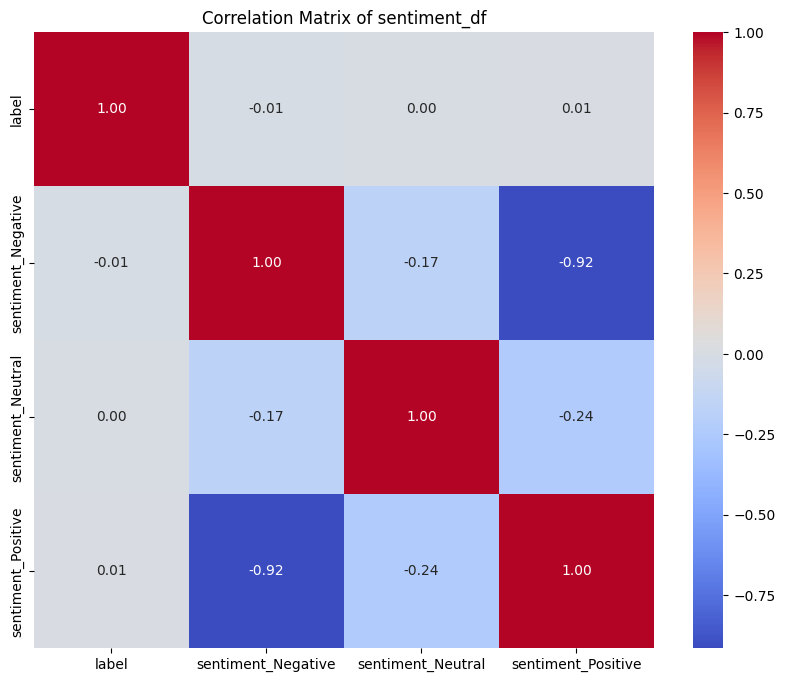

In [ ]:
# One-hot encode the sentiment column
sentiment_encoded = pd.get_dummies(sentiment_df['sentiment'], prefix='sentiment')

# Concatenate the encoded columns with the original dataframe
sentiment_df_encoded = pd.concat([sentiment_df, sentiment_encoded], axis=1)

# Compute the correlation matrix
sentiment_corr_matrix = sentiment_df_encoded.iloc[:,1:].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of sentiment_df')
plt.show()